evaluate the following: <br>
$$ \int_{0}^{1}x^2sin(2x)e^{-x} $$

In [10]:
import numpy as np
from scipy.integrate import quad #quad is the module used for integrations

In [58]:
#define integrand as a function first
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
#evaluate the integral
integral = quad(integrand, 0,1)
integral

(0.14558175869954834, 1.6162822047366225e-15)

evaluate the following: <br>


In [16]:
from scipy.integrate import dblquad

In [25]:
integrand = lambda x,y: np.sin(x + y**2)
lwr_y = lambda x:-x
uppr_y = lambda x:x**2
integral,integral_err = dblquad(integrand,0,1,lwr_y,uppr_y)
integral,integral_err

(0.315802507240474, 1.5634600713498928e-14)

In [31]:
intgnd = lambda x: 1/(x**2 - x + 1)

In [35]:
intgrl1, intgrl_err1 = quad(intgnd,1,2)
intgrl1, intgrl_err1

(0.6045997880780726, 6.712406054077664e-15)

Solve the following ODEINT <br>
http://apmonitor.com/pdc/index.php?n=Main/simulateHIV

In [43]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

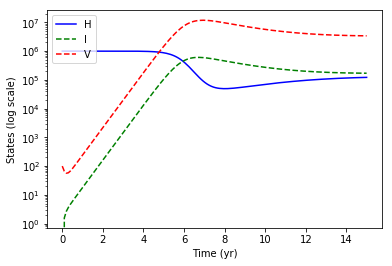

In [56]:
def HIV_func(z,t): #system of 3 differenctials with time in healthy cells (H), Infected cells (I) and virus count (V)
    H = z[0]
    I = z[1]
    V = z[2]
    
    #set the constants (as provided in the sample question)
    kr1 = 1e5
    kr2 = 0.1
    kr3 = 2e-7
    kr4 = 0.5
    kr5 = 5
    kr6 = 100
    
    #define the differentials
    dHdt = kr1 - kr2*H - kr3*H*V
    dIdt = kr3*H*V - kr4*I
    dVdt = -kr3*H*V - kr5*V + kr6*I
    
    return [dHdt, dIdt, dVdt]

t = np.linspace(0,15,150)
z0 = [1000000,0,100]
H,I,V = odeint(HIV_func,z0,t)[:,0] , odeint(HIV_func,z0,t)[:,1] , odeint(HIV_func,z0,t)[:,2]
plt.semilogy(t,H,'b-')
plt.semilogy(t,I,'g--')
plt.semilogy(t,V,'r--')
plt.xlabel('Time (yr)')
plt.ylabel('States (log scale)')
plt.legend(['H','I','V'],loc = 2)

In [52]:
plt.legend?